# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

**Note:** This notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Dandiset Overview

This Dandiset ([DANDI:001366/0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603)) contains movies of pial vessels of mice used in experiments designed to compare different approaches for quantifying surface vessel diameter and pulsatility. Understanding vessel diameter and pulsatility is crucial for studying cerebrovascular health and disease. Changes in these parameters can indicate conditions like hypertension, stroke, and neurovascular coupling dysfunction. The data includes imaging data in NWB format, which is a standardized format for neurophysiology data.

## Notebook Content

This notebook will demonstrate how to:
- Load the Dandiset using the DANDI API.
- Load an NWB file from the Dandiset.
- Inspect the contents and metadata of the NWB file.
- Visualize the movie data of the pial vessels.
- Explore pixel intensity changes over time in different regions (vessel and background).
- Illustrate a method for approximating vessel diameter using a line profile.

## Required Packages

This notebook requires the following packages to be installed in your environment:
- dandi
- pynwb
- h5py
- remfile
- matplotlib
- numpy
- seaborn

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set seaborn theme for better aesthetics (optional)
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001366", "0.250324.1603")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata['description']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification
Dandiset URL: https://dandiarchive.org/dandiset/001366/0.250324.1603
Dandiset description: movies of a pial vessel of mice used in the experiments.

First 5 assets:
- sub-F15/sub-F15_ses-F15BC-19102023_image.nwb (ID: 71fa07fc-4309-4013-8edd-13213a86a67d)
- sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb (ID: 2f12bce3-f841-46ca-b928-044269122a59)


## Loading an NWB file

This Dandiset contains NWB files with movie data. We will load the NWB file located at `sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb`.
The URL for this asset, which we will use for streaming data, is: `https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/`

In [2]:
# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some metadata from the NWB file
print("NWB File Metadata:")
print(f"- Session description: {nwb.session_description}")
print(f"- Identifier: {nwb.identifier}")
print(f"- Session start time: {nwb.session_start_time}")
print(f"- Subject ID: {nwb.subject.subject_id}")
print(f"- Subject sex: {nwb.subject.sex}")
print(f"- Subject species: {nwb.subject.species}")
print(f"- Experiment description: {nwb.experiment_description}")

NWB File Metadata:
- Session description: the mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
- Identifier: Qinwen_6th_March_03122024-m4-baseline
- Session start time: 2024-03-12 01:00:00-04:00
- Subject ID: 031224_M4
- Subject sex: M
- Subject species: Mus musculus
- Experiment description: Vessel diameter and pulsatility measurement.


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Contents and Structure Exploration

We can inspect the structure of the NWB file to understand how the data is organized. The primary movie acquisition data is typically found within the `acquisition` group.

In [3]:
# Explore the keys in the acquisition group
print("Keys in nwb.acquisition:")
for key in nwb.acquisition.keys():
    print(f"- {key} ({type(nwb.acquisition[key]).__name__})")

# Access the 'Movies' ImageSeries
if 'Movies' in nwb.acquisition:
    movies_series = nwb.acquisition['Movies']
    print("\n'Movies' ImageSeries details:")
    print(f"- Description: {movies_series.description}")
    print(f"- Data shape: {movies_series.data.shape} (time, height, width)")
    print(f"- Data dtype: {movies_series.data.dtype}")
    print(f"- Rate: {movies_series.rate} {movies_series.starting_time_unit}")
    print(f"- Starting time: {movies_series.starting_time} {movies_series.starting_time_unit}")
else:
    print("\n'Movies' ImageSeries not found in nwb.acquisition.")

Keys in nwb.acquisition:
- Movies (ImageSeries)

'Movies' ImageSeries details:
- Description: 16-bit grayscale movie of a pial vessel
- Data shape: (6000, 512, 512) (time, height, width)
- Data dtype: uint16
- Rate: 30.0 seconds
- Starting time: 0.0 seconds


The output confirms that the main data is stored in an `ImageSeries` object named 'Movies', with the expected shape and data type for a movie recording. The shape (6000, 512, 512) indicates 6000 frames, each with a resolution of 512x512 pixels. The rate of 30.0 seconds indicates a frame rate of 30 frames per second.

## Explore in Neurosift

You can explore this NWB file directly in Neurosift, a web-based viewer for neurophysiology data, using the following link:
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/2f12bce3-f841-46ca-b928-044269122a59/download/&dandisetId=001366&dandisetVersion=draft

## Visualizing the Movie Data

We can visualize individual frames from the movie data to get a visual understanding of the pial vessels. Here, we will plot the first frame.

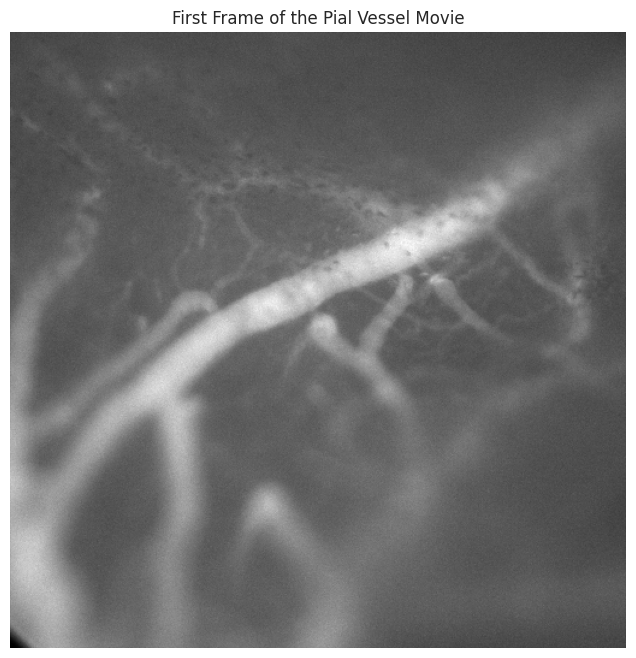

In [4]:
# Get the movie data
movie_data = nwb.acquisition['Movies'].data

# Load the first frame
first_frame = movie_data[0, :, :]

# Plot the frame
plt.figure(figsize=(8, 8))
plt.imshow(first_frame, cmap='gray')
plt.title('First Frame of the Pial Vessel Movie')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.axis('off')
plt.show()

The image above shows the initial state of the pial vessel network captured in the movie. We can observe the branching structure of the vessels.

## Pixel Intensity Over Time: Vessel vs. Background

Examining the intensity changes of individual pixels can reveal dynamic processes like blood flow and vessel pulsatility. It's informative to compare the intensity changes in a pixel located within a vessel versus a pixel in the background. Significant fluctuations are expected in vessel regions due to blood flow and pulsatility, while background regions should show more stable intensity.

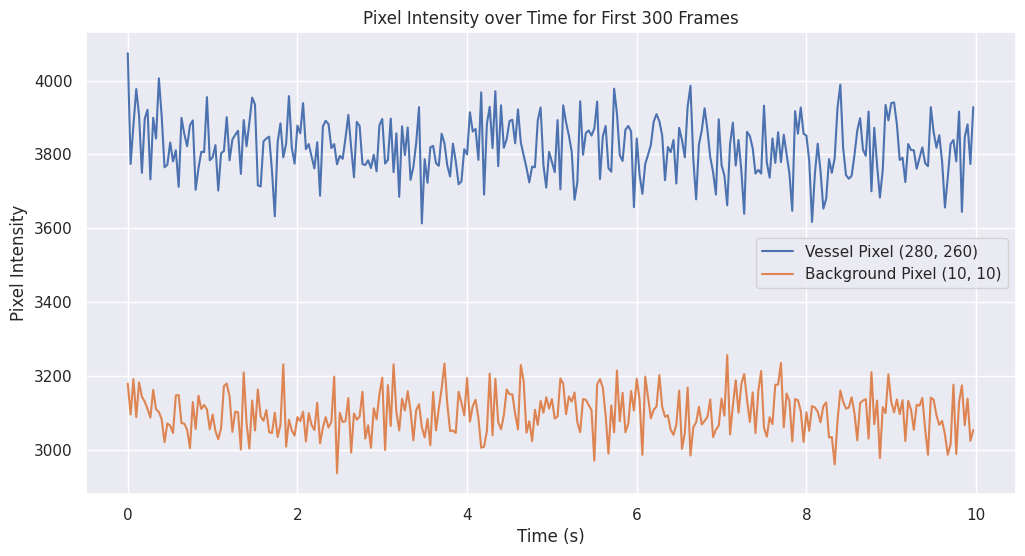

In [5]:
# Choose pixel coordinates: one in a vessel, one in the background
# (These coordinates are chosen based on visual inspection of the first frame)
vessel_pixel_y, vessel_pixel_x = 280, 260 # Example coordinates within a vessel
background_pixel_y, background_pixel_x = 10, 10 # Example coordinates in the background
num_frames_to_plot = 300 # Plot for the first 300 frames

# Extract intensity values for the chosen pixels
vessel_intensity_values = movie_data[:num_frames_to_plot, vessel_pixel_y, vessel_pixel_x]
background_intensity_values = movie_data[:num_frames_to_plot, background_pixel_y, background_pixel_x]


# Get the timestamps for these frames
timestamps_subset = (np.arange(num_frames_to_plot) / nwb.acquisition['Movies'].rate) + nwb.acquisition['Movies'].starting_time

# Plot the intensity over time for both pixels
plt.figure(figsize=(12, 6))
plt.plot(timestamps_subset, vessel_intensity_values, label=f'Vessel Pixel ({vessel_pixel_y}, {vessel_pixel_x})')
plt.plot(timestamps_subset, background_intensity_values, label=f'Background Pixel ({background_pixel_y}, {background_pixel_x})')
plt.xlabel('Time (s)')
plt.ylabel('Pixel Intensity')
plt.title(f'Pixel Intensity over Time for First {num_frames_to_plot} Frames')
plt.legend()
plt.grid(True)
plt.show()

The plot shows a clear difference in intensity dynamics between a pixel in a vessel and a background pixel. The vessel pixel exhibits noticeable fluctuations, likely related to blood flow and pulsatility, while the background pixel's intensity remains relatively constant.

## Illustrating Vessel Diameter Measurement with a Line Profile

One common approach to quantify vessel diameter from imaging data is to analyze the intensity profile across the vessel. The vessel appears brighter or darker than the background, and the width of this intensity change can be used to estimate the diameter. We can illustrate this by plotting the intensity values along a line segment that crosses a vessel.

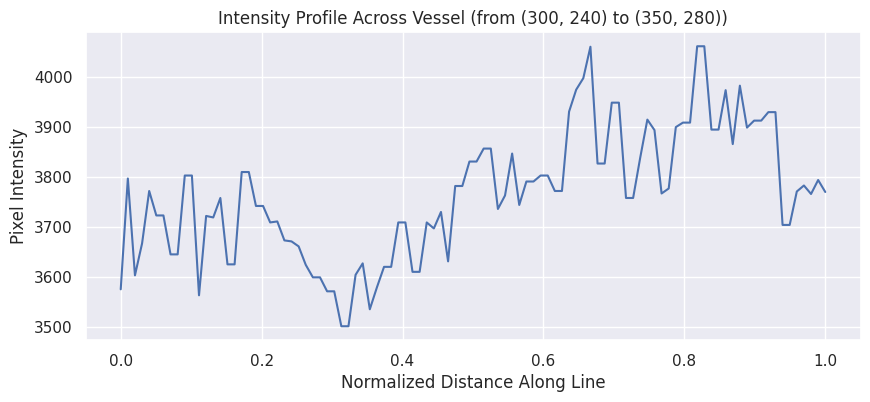

In [6]:
# Load a single frame for line profile analysis (e.g., the first frame)
frame_for_profile = movie_data[0, :, :]

# Define the start and end points of the line segment across a vessel
# (These coordinates should ideally cross a vessel perpendicularly)
start_x, start_y = 240, 300 # Example start point
end_x, end_y = 280, 350 # Example end point
num_points = 100 # Number of points to sample along the line

# Create the line profile coordinates
x = np.linspace(start_x, end_x, num_points)
y = np.linspace(start_y, end_y, num_points)

# Sample the intensity values along the line
# We use np.round and convert to int because array indexing requires integer coordinates
intensity_profile = frame_for_profile[np.round(y).astype(int), np.round(x).astype(int)]

# Plot the intensity profile
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, 1, num_points), intensity_profile) # Plot against normalized distance along the line
plt.xlabel('Normalized Distance Along Line')
plt.ylabel('Pixel Intensity')
plt.title(f'Intensity Profile Across Vessel (from ({start_y}, {start_x}) to ({end_y}, {end_x}))')
plt.grid(True)
plt.show()

The plot above shows the intensity profile along a line segment crossing a vessel. The 'dip' or 'peak' in intensity corresponds to the vessel. The width of this feature in the intensity profile can be used as a basis for estimating the vessel diameter. More sophisticated methods involve fitting functions (e.g., Gaussian or error functions) to this profile to get a precise estimate of the width.

## Summary and Future Directions

This notebook provided a basic introduction to accessing, exploring, and performing initial visualizations of the pial vessel movie data from Dandiset 001366. We demonstrated how to load the Dandiset and an NWB file, inspect its structure and metadata, visualize a movie frame, compare pixel intensity dynamics in vessel and background regions, and illustrate a method for approximating vessel diameter using a line profile.

This Dandiset is specifically focused on comparing approaches for quantifying vessel diameter and pulsatility. Building upon this introduction, future analyses could involve implementing and comparing different algorithms for automated vessel segmentation, diameter measurement (e.g., using techniques like the Radon transform or fitting intensity profiles), and quantifying pulsatility by analyzing the temporal changes in diameter. These quantitative analyses would directly address the primary research question of the Dandiset.